FileNotFoundError: [Errno 2] No such file or directory: '/path/to/data/40cm_run3DLC_resnet50_40cm_newOct1shuffle1_100000_filtered.csv'

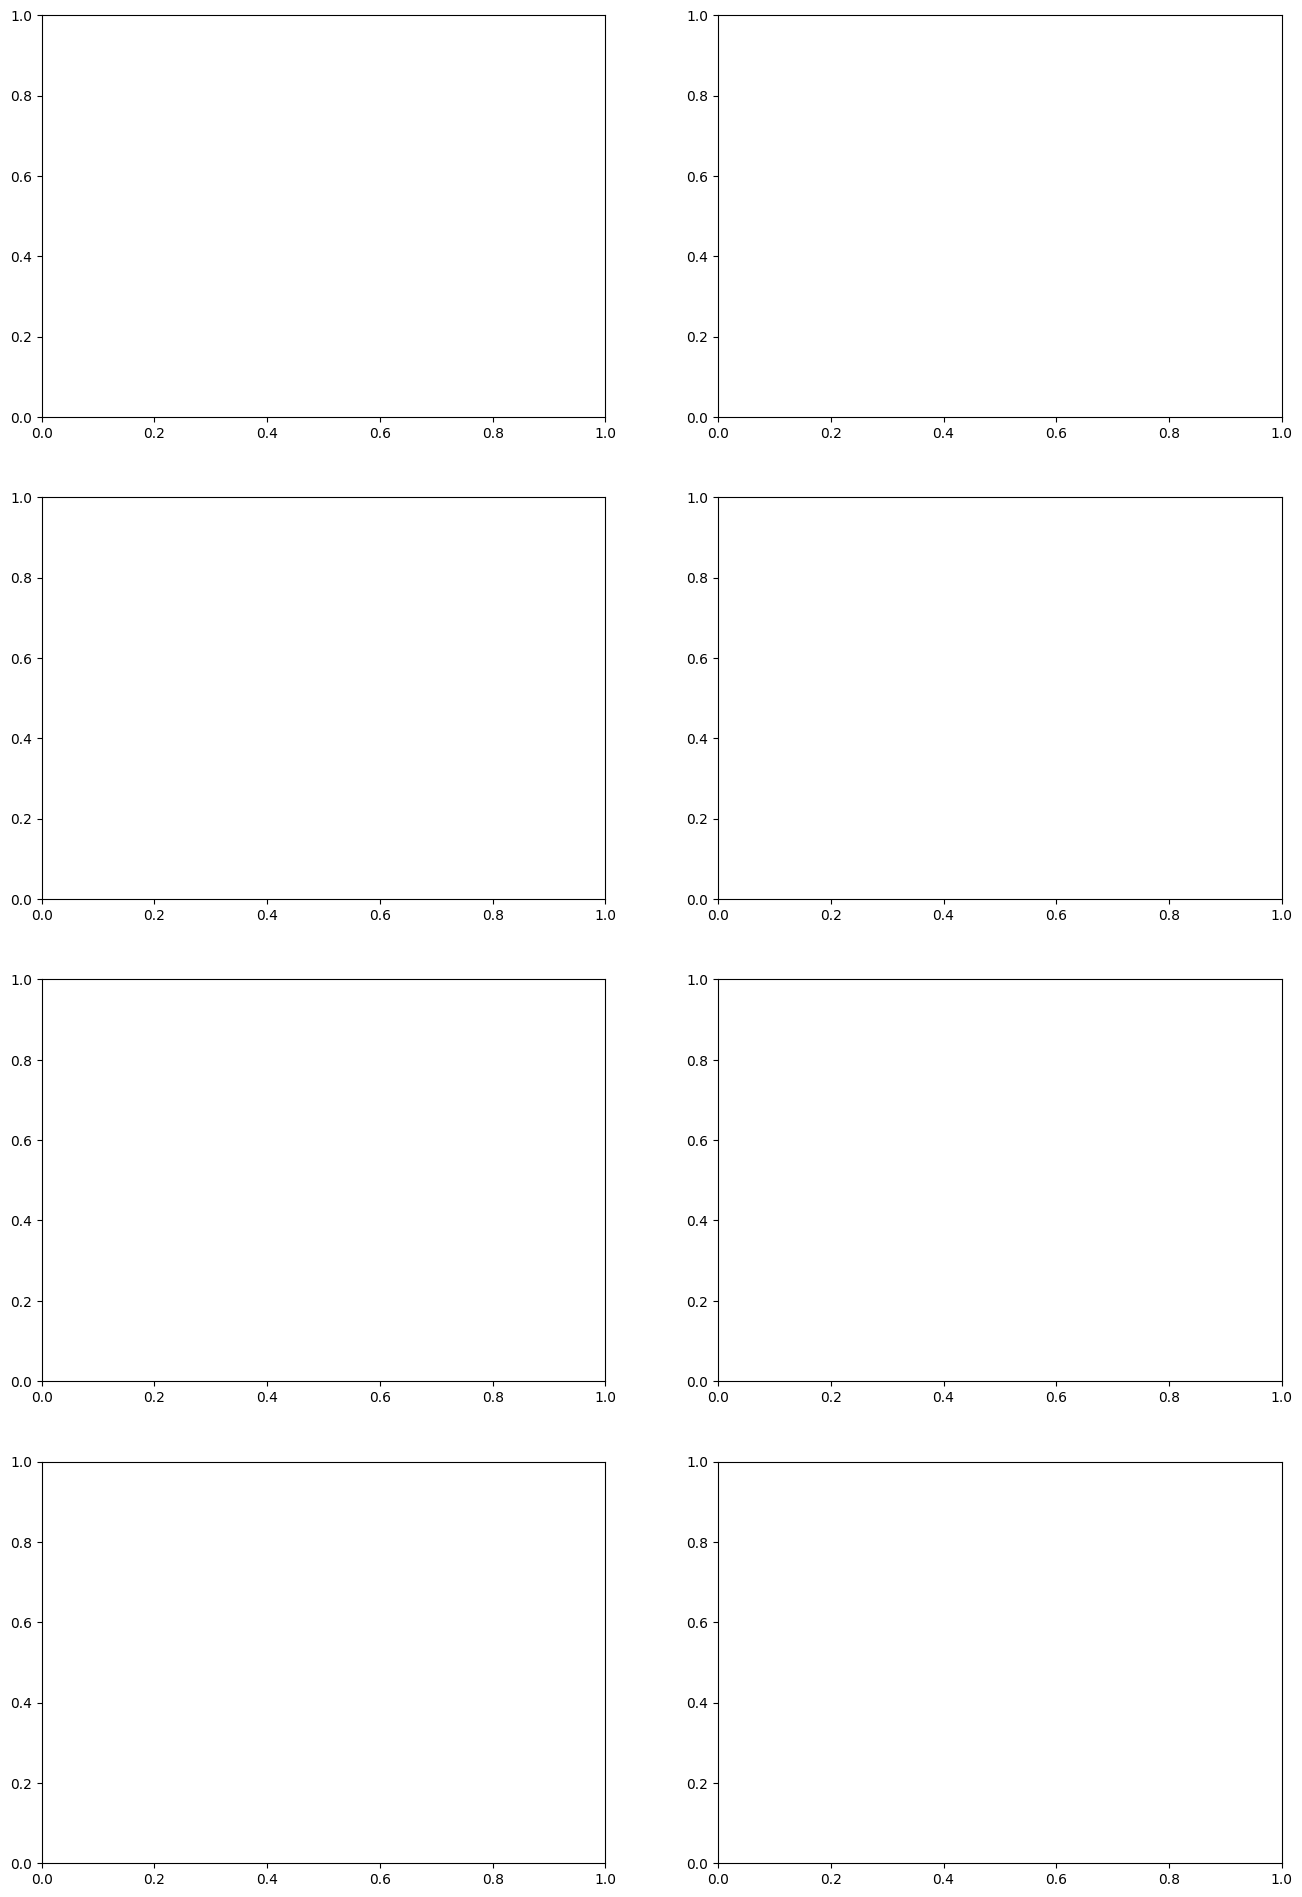

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize coordinates
def normalize_coordinates(df, x_length_meters, y_length_meters):
    """
    Normalize the x and y coordinates based on their pixel range and the real-world lengths.
    """
    # Calculate normalization factors for both axes
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    
    normalization_factor_y = y_length_meters / y_length_pixels
    normalization_factor_x = x_length_meters / x_length_pixels
    
    # Normalize the coordinates
    x_coords = df.iloc[2:, ::2].apply(pd.to_numeric, errors='coerce') * normalization_factor_x
    y_coords = df.iloc[2:, 1::2].apply(pd.to_numeric, errors='coerce') * normalization_factor_y
    
    return x_coords, y_coords

# Function to calculate total and cumulative displacement
def calculate_displacement(x_coords, y_coords):
    """
    Calculate total and cumulative displacement from normalized x and y coordinates.
    """
    # Calculate displacement between frames (difference between consecutive frames)
    displacement_x = x_coords.diff().mean(axis=1)
    displacement_y = y_coords.diff().mean(axis=1)

    # Calculate total displacement and cumulative displacement
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    cumulative_displacement = total_displacement.cumsum()

    return total_displacement.sum(), cumulative_displacement

# Main function to process a file and calculate displacements
def process_file(file_path, x_length_meters=0.5625, y_length_meters=1):
    """
    Load a CSV file, normalize coordinates, and calculate total and cumulative displacement.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Normalize coordinates
    x_coords, y_coords = normalize_coordinates(df, x_length_meters, y_length_meters)
    
    # Calculate displacement
    total_disp, cumulative_disp = calculate_displacement(x_coords, y_coords)
    
    return total_disp * 100, cumulative_disp * 100  # Convert to cm

# Plotting function to display results
def plot_displacements(data_sets, file_paths):
    """
    Plot the total and cumulative displacements for different datasets and runs.
    """
    # Create figure with subplots
    fig, axes = plt.subplots(4, 2, figsize=(16, 24))

    # Loop through datasets
    for i, dataset in enumerate(data_sets):
        displacements = []
        cumulative_displacements = []

        # Process each file for the dataset
        for file_path in file_paths[dataset]:
            total_disp, cumulative_disp = process_file(file_path)
            displacements.append(total_disp)
            cumulative_displacements.append(cumulative_disp)

        # Plot total displacement
        ax_total_disp = axes[i, 0]
        ax_total_disp.plot(range(3, 9), displacements, marker='o', linestyle='-', color='b')
        ax_total_disp.set_title(f'Total Displacement for {dataset} (in cm)')
        ax_total_disp.set_xlabel('Run Number')
        ax_total_disp.set_ylabel('Total Displacement (cm)')
        ax_total_disp.grid(True)
        ax_total_disp.set_xticks(range(3, 9))  # Set x-ticks for run numbers

        # Plot cumulative displacement vs frame
        ax_cumulative_disp = axes[i, 1]
        for j, cumulative_disp in enumerate(cumulative_displacements):
            ax_cumulative_disp.plot(cumulative_disp, label=f'Run {j + 3}')
        ax_cumulative_disp.set_title(f'Cumulative Displacement for {dataset} (in cm)')
        ax_cumulative_disp.set_xlabel('Frame')
        ax_cumulative_disp.set_ylabel('Cumulative Displacement (cm)')
        ax_cumulative_disp.grid(True)
        ax_cumulative_disp.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Define datasets and file paths
    data_sets = ['40cm', '32cm', '24cm', '16cm']
    runs = ['run3', 'run4', 'run5', 'run6', 'run7', 'run8']

    file_paths = {
        '40cm': [f'/path/to/data/40cm_{run}DLC_resnet50_40cm_newOct1shuffle1_100000_filtered.csv' for run in runs],
        '32cm': [f'/path/to/data/32cm_{run}DLC_resnet50_32cm_newOct2shuffle1_100000_filtered.csv' for run in runs],
        '24cm': [f'/path/to/data/24cm_{run}DLC_resnet50_24cm_newOct2shuffle1_100000_filtered.csv' for run in runs],
        '16cm': [f'/path/to/data/16cm_{run}DLC_resnet50_16cm_newOct3shuffle1_100000_filtered.csv' for run in runs]
    }

    # Plot displacements
    plot_displacements(data_sets, file_paths)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


NameError: name 'os' is not defined